In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calcSSQ(ordered_data):
    differences = np.diff(ordered_data, axis=1)
    sum_of_squares = np.sum(differences ** 2, axis=0)
    return sum_of_squares

In [3]:
class InfSys:
    def __init__(self, num_people, num_timesteps):
        self.num_people = num_people
        self.num_timesteps = num_timesteps

    def generate(self):
        # Generate random timeseries data (each row is an individual, each column is a timestep)
        self.value_timeseries_data = np.random.rand(self.num_people, self.num_timesteps) * 10  # Random real values
        
        # Rank the users at each timestep (lowest value gets rank 1, highest gets rank num_people)
        self.ranked_timeseries_data = np.argsort(np.argsort(self.value_timeseries_data, axis=0), axis=0) + 1

    def calcRankedSSQ(self):
        self.ranked_ssq = calcSSQ(self.ranked_timeseries_data)
        return self.ranked_ssq

    def calcValueSSQ(self):
        self.value_ssq = calcSSQ(self.value_timeseries_data)
        return self.value_ssq

    def plot_hist(self, data, ax=None, title=None):
        if title is None:
            timeseries_df = pd.DataFrame(data, columns=[f"SSQ-{self.num_people}"], index=[f"T{i}" for i in range(1, self.num_timesteps)])
        else:
            timeseries_df = pd.DataFrame(data, columns=[title], index=[f"T{i}" for i in range(1, self.num_timesteps)])
        if ax is None:
            timeseries_df.hist(bins=100)#, density=True)
        else:
            timeseries_df.hist(bins=100, ax=ax)#, density=True)
        # plt.xscale('log')
        # plt.yscale('log')

    def calc_all(self):
        self.calcRankedSSQ()
        self.calcValueSSQ()

array([<Axes: title={'center': '0'}>], dtype=object)

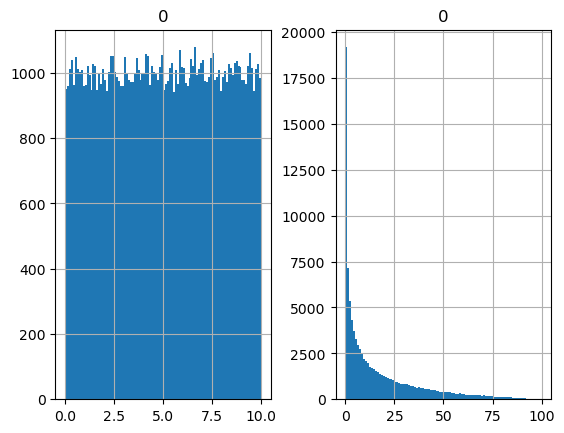

In [4]:
thisSys = InfSys(1, 100000)
thisSys.generate()
thisSys.calc_all()

fig, (ax1, ax2) = plt.subplots(1,2)
pd.DataFrame(thisSys.value_timeseries_data[0]).hist(bins=100, ax=ax1)
pd.DataFrame(thisSys.value_ssq).hist(bins=100, ax=ax2)

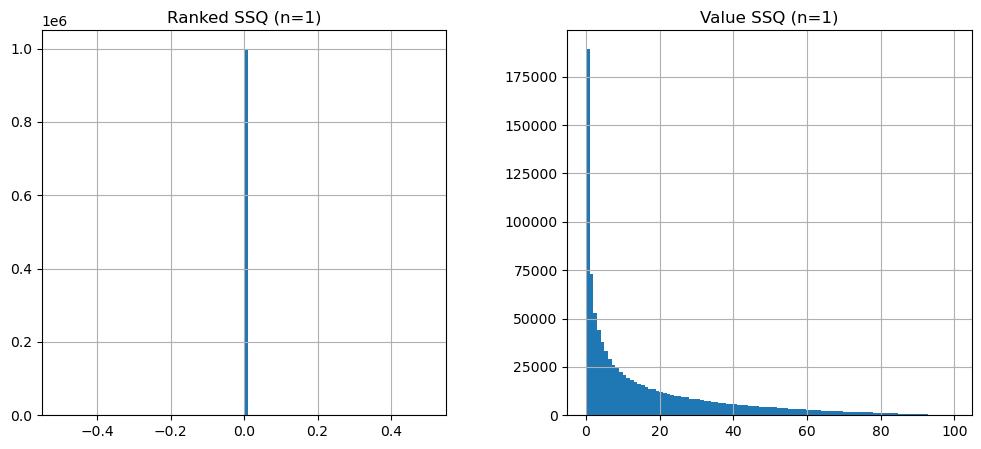

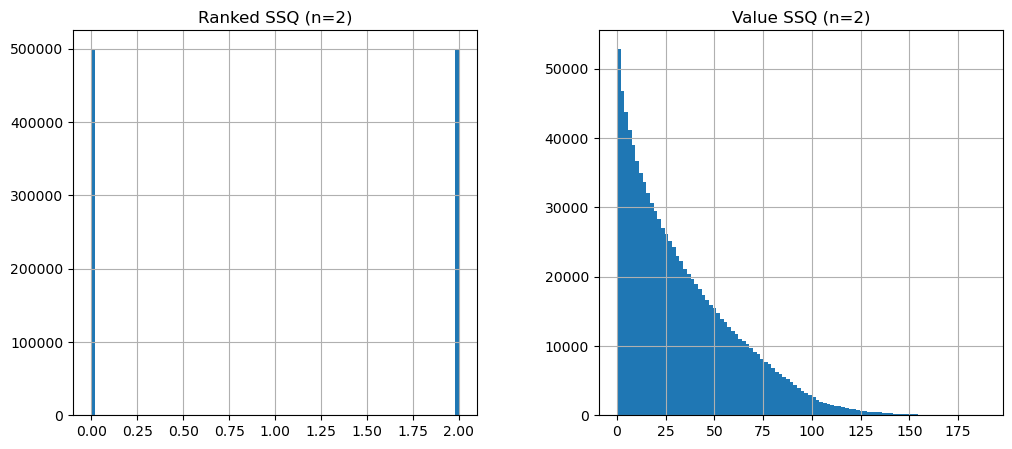

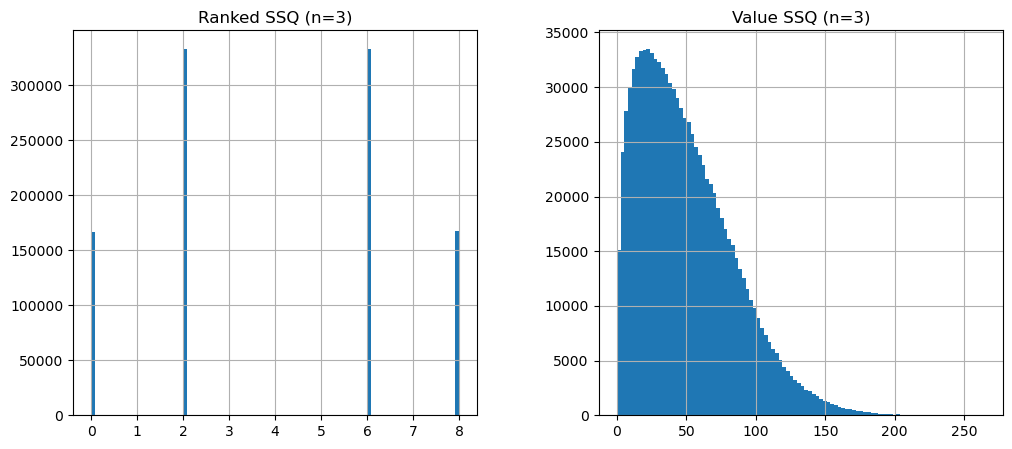

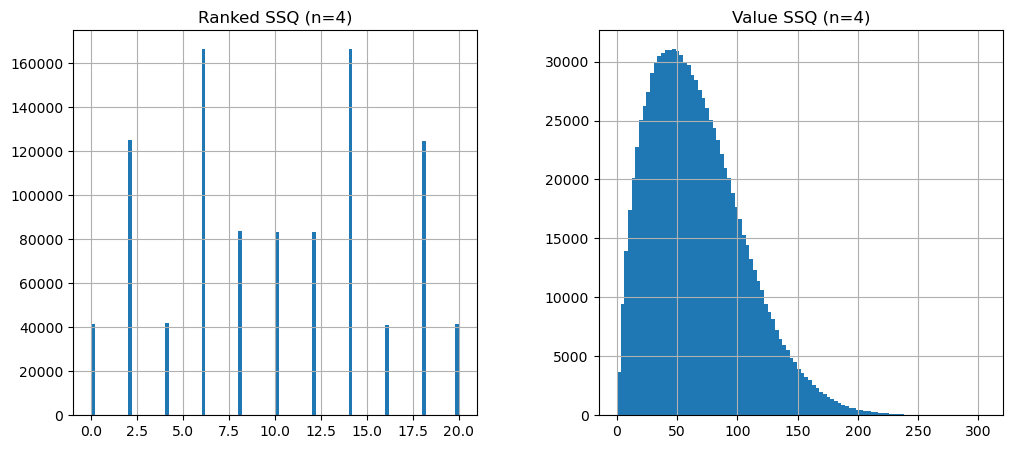

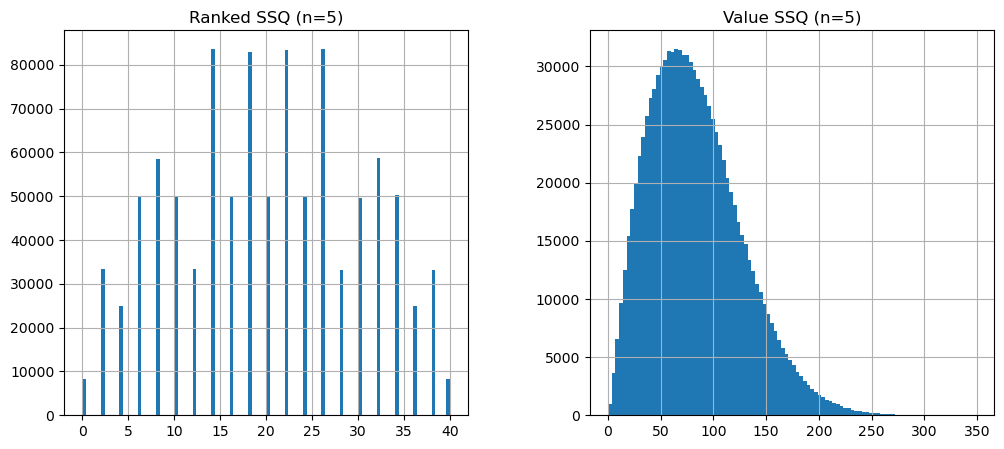

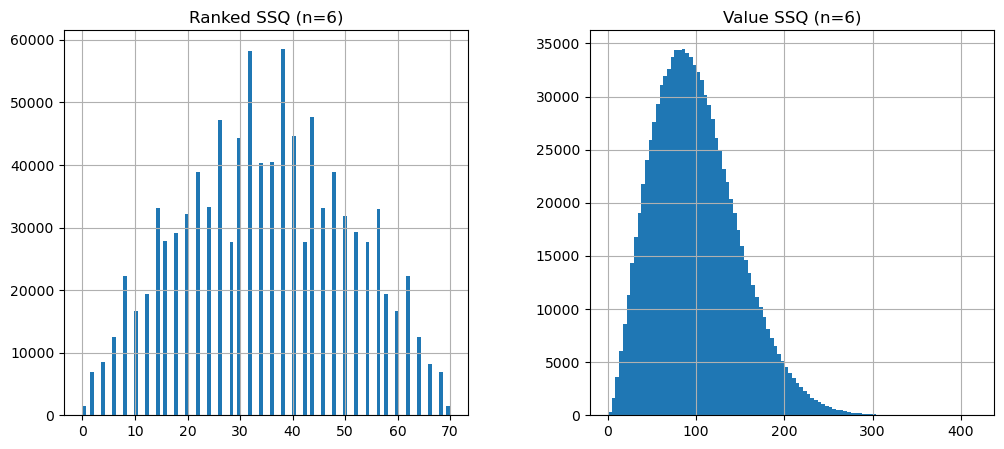

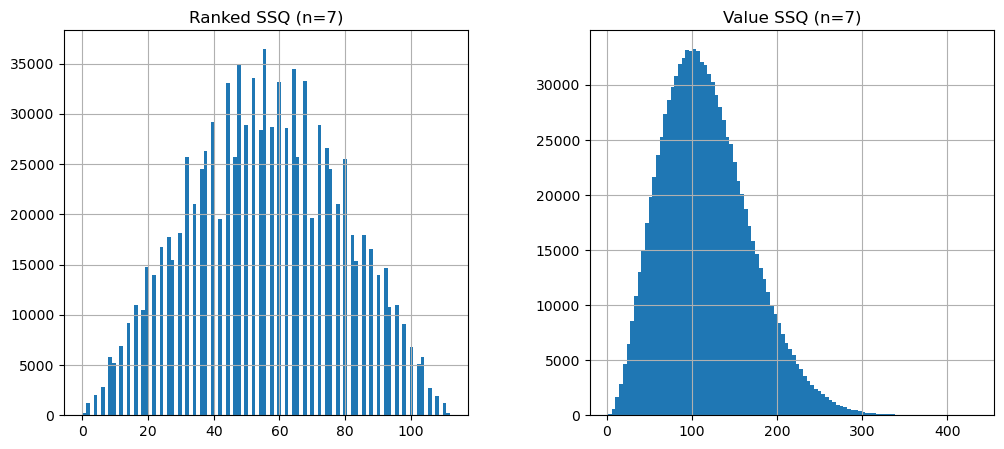

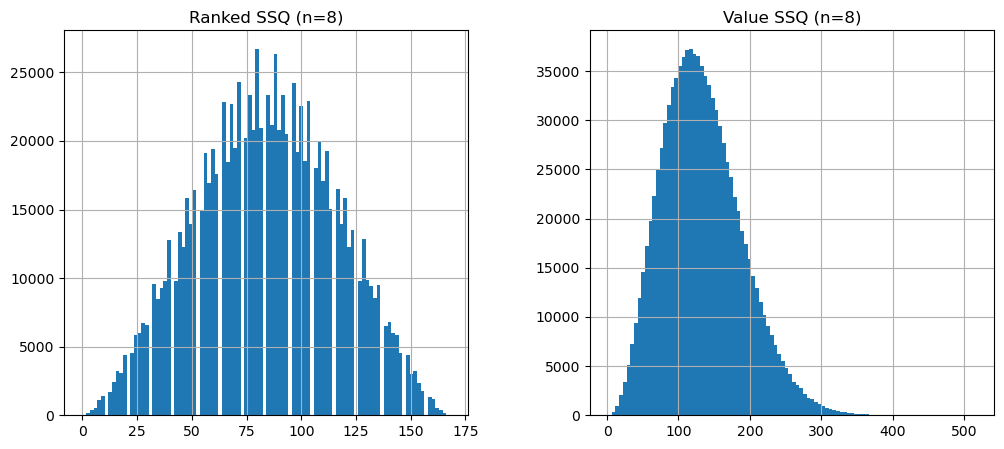

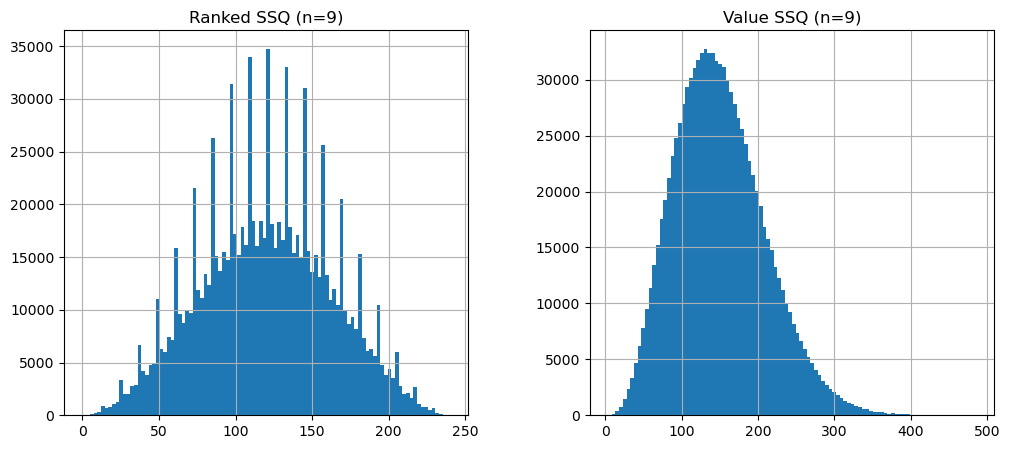

In [14]:
num_samples = 1000000
for num_people in range(1,10):
    thisSys = InfSys(num_people, num_samples)
    thisSys.generate()
    thisSys.calc_all()
    #fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15,5))
    #pd.DataFrame(thisSys.value_timeseries_data[0]).hist(bins=100, ax=ax0)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    thisSys.plot_hist(thisSys.ranked_ssq, ax1, f"Ranked SSQ (n={thisSys.num_people})")
    thisSys.plot_hist(thisSys.value_ssq, ax2, f"Value SSQ (n={thisSys.num_people})")
    plt.show()

In [6]:
# Parameters
num_people = 3  # Number of individuals
num_timesteps = 10000  # Number of timesteps

# Generate random timeseries data (each row is an individual, each column is a timestep)
timeseries_data = np.random.rand(num_people, num_timesteps) * 10  # Random real values

# Rank the users at each timestep (lowest value gets rank 1, highest gets rank num_people)
ranked_data = np.argsort(np.argsort(timeseries_data, axis=0), axis=0) + 1

In [7]:
pd.DataFrame(timeseries_data)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,5.859339,0.745743,2.025464,8.458830,4.931262,1.450832,3.812346,2.660377,5.207515,2.032817,...,1.591659,2.858963,3.860614,5.196063,9.107051,3.146869,8.169543,9.419113,5.349952,2.367536
1,3.276929,0.671269,1.684259,7.635915,6.917850,8.531672,6.869759,3.383779,2.807116,8.550078,...,3.564416,0.890769,7.337893,9.249334,4.167442,1.306180,6.537367,2.850002,5.943248,0.830056
2,9.426033,2.798881,8.347791,9.533802,0.635810,4.063892,3.502176,2.831508,1.158859,7.227107,...,3.612488,2.868359,0.022725,1.803588,5.515546,3.516879,4.261739,1.936404,0.766944,5.724138


In [8]:
pd.DataFrame(ranked_data)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,2,2,2,2,2,1,2,1,3,1,...,1,2,2,2,3,2,3,3,2,2
1,1,1,1,1,3,3,3,3,2,3,...,2,1,3,3,1,1,2,2,3,1
2,3,3,3,3,1,2,1,2,1,2,...,3,3,1,1,2,3,1,1,1,3


In [9]:
differences = np.diff(ranked_data, axis=1)
pd.DataFrame(differences)

,0,1,2,3,4,5,6,7,8,9,...,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998
0,0,0,0,0,-1,1,-1,2,-2,1,...,-2,1,0,0,1,-1,1,0,-1,0
1,0,0,0,2,0,0,0,-1,1,-2,...,1,-1,2,0,-2,0,1,0,1,-2
2,0,0,0,-2,1,-1,1,-1,1,1,...,1,0,-2,0,1,1,-2,0,0,2


In [10]:
sum_of_squares = np.sum(differences ** 2, axis=0)
sum_of_squares

array([0, 0, 0, ..., 0, 2, 8], dtype=int64)

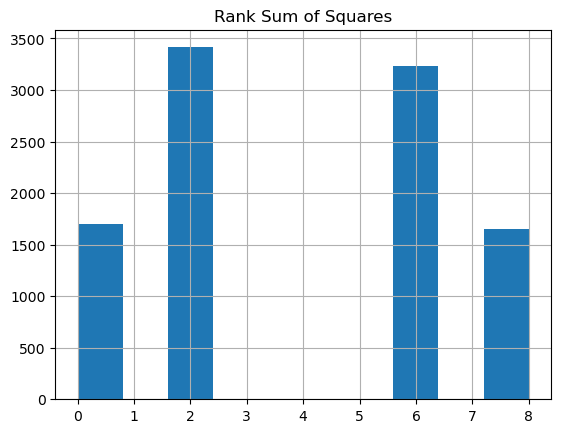

In [11]:
rank_timeseries_df = pd.DataFrame(sum_of_squares, columns=["Rank Sum of Squares"], index=[f"T{i}" for i in range(1, num_timesteps)])
rank_timeseries_df.hist()
plt.show()

In [12]:




# Compute sum of squares of differences for each individual across timesteps
differences = np.diff(timeseries_data, axis=1)  # Compute differences between consecutive timesteps
sum_of_squares = np.sum(differences**2, axis=0)  # Sum of squares over individuals

# Rank the users at each timestep (lowest value gets rank 1, highest gets rank num_people)
ranked_data = np.argsort(np.argsort(timeseries_data, axis=0), axis=0) + 1

# Compute sum of squares of differences for ranks
rank_differences = np.diff(ranked_data, axis=1)  # Compute differences between consecutive timesteps
rank_sum_of_squares = np.sum(rank_differences**2, axis=0)  # Sum of squares over individuals

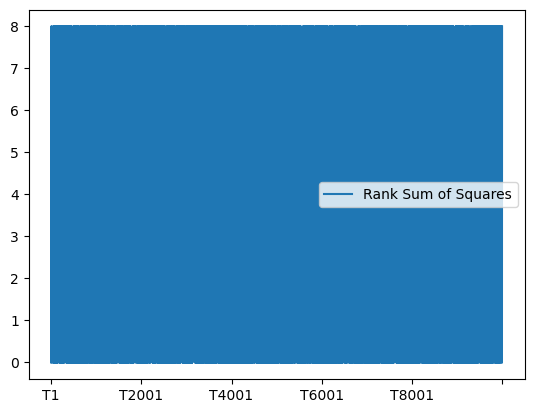

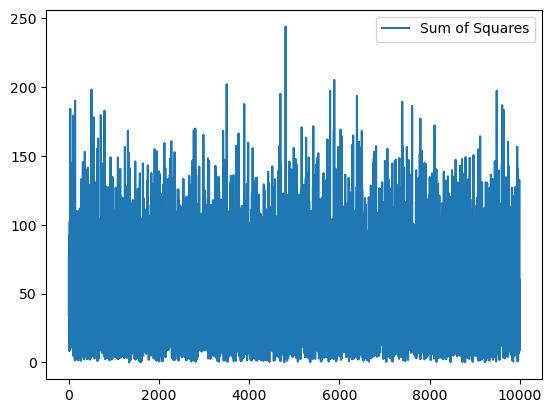

In [13]:
rank_timeseries_df = pd.DataFrame(rank_sum_of_squares, columns=["Rank Sum of Squares"], index=[f"T{i}" for i in range(1, num_timesteps)])
rank_timeseries_df.plot()
timeseries_df = pd.DataFrame(sum_of_squares, columns=["Sum of Squares"])
timeseries_df.plot()
plt.show()